In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
%matplotlib inline

In [2]:
from pathlib import Path

In [3]:
from collections import defaultdict

In [4]:
results_path = Path("results/")

In [5]:
dev_success = defaultdict(list)
pt_success = defaultdict(list)

for result_path in results_path.iterdir():
    name = result_path.name
    if name.endswith(("dev_success", "pt_success")):
        k = int(name[:name.index(".")])
        value = float(result_path.read_text().strip())
        if name.endswith("dev_success"):
            dev_success[k].append(value)
        elif name.endswith("pt_success"):
            pt_success[k].append(value)

In [6]:
dev_success

defaultdict(list,
            {0: [94.998,
              97.19,
              93.124,
              95.312,
              92.812,
              93.44,
              93.436,
              95.312,
              93.124,
              92.812,
              94.688,
              94.374,
              94.376,
              94.376,
              95.94,
              96.562,
              93.436,
              94.064,
              93.438,
              95.312,
              92.814,
              94.378,
              92.814,
              93.75,
              94.062,
              93.748,
              91.246,
              93.752,
              92.812,
              91.25,
              94.688,
              95.002,
              95.0,
              95.938,
              94.376,
              93.748,
              94.69,
              94.064,
              94.062,
              90.934,
              90.936,
              95.626,
              90.312,
              93.122,
              93.12

In [7]:
print([len(xs) for xs in dev_success.values()])
print([len(xs) for xs in pt_success.values()])

[50, 50, 50, 50, 50, 50, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50]


In [8]:
keys = sorted(dev_success.keys())

In [9]:
dev_success = np.array([dev_success[key] for key in keys])
pt_success = np.array([pt_success[key] for key in keys])

In [10]:
dev_success.shape

(8, 50)

In [11]:
x_entries = [2 ** x for x in range(8)]

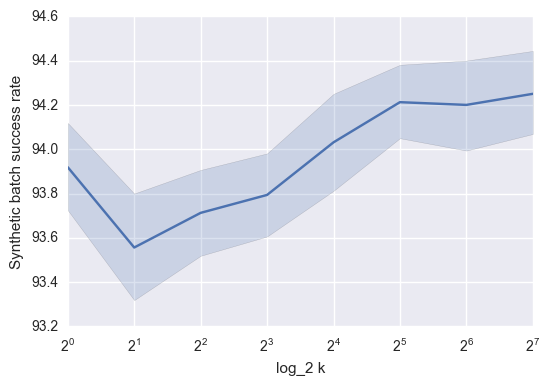

In [16]:
ax = plt.subplot()
ax.set_xlim(0, 64)
ax.set_ylabel("Synthetic batch success rate")
ax.set_xlabel("log_2 k")
ax.set_xscale("log", basex=2)
sns.tsplot(dev_success.T, time=x_entries, ax=ax)

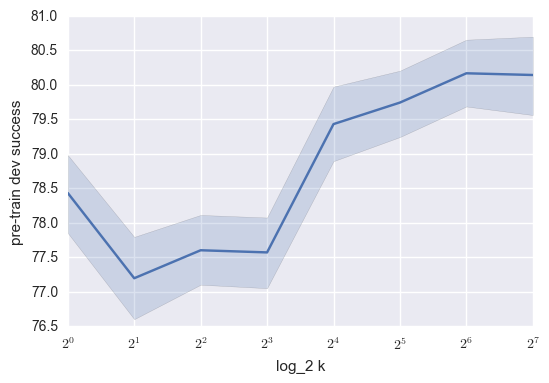

In [13]:
ax = plt.subplot()
ax.set_xlim(0, 64)
ax.set_ylabel("pre-train dev success")
ax.set_xlabel("log_2 k")
ax.set_xscale("log", base=2)
ax.set_xticks(np.power(2, np.arange(8)))
ax.set_xticklabels(["$2^%i$" % x for x in range(8)])
sns.tsplot(pt_success.T, time=x_entries, ax=ax)